<a href="https://colab.research.google.com/github/FerNishino/Carteira_Ibovespa/blob/main/Portf%C3%B3lio_Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Portfólio: Como montar a carteira previdenciária e realizar a comparação entre ela e Ibovespa utilizando o Python

In [ ]:
# Autor: Fernando Nishino
# Data: 18/02/2023

In [ ]:
# Importar as bibliotecas necessárias

!pip install yfinance
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override()

In [ ]:
# Para começar, vamos utilizar a Análise fundamentalista que é uma das técnicas que serve para avaliar se uma empresa é saudável 
#financeiramente para facilitar o filtro e podemos utilizar as boas pagadoras de dividendos também.

# 5 principais indicadores para filtrar boas empresas: 

# Margem liquida acima de 15% - Empresas Lucrativas, ROE acima de 10% - Empresas rentáveis, Dívida controlada menor que 2 e 
# Dividendos no mínimo de 5% de dividendos.

# Para diversificar a carteira minimizando os riscos - 10 ações selecionadas para montar a Carteira Previdenciária.

In [ ]:
# Podemos usar o filtro das empresas pelo site https://statusinvest.com.br/acoes/busca-avancada para filtrar conforme os critérios acima.

# Ações selecionadas: 1: RANI3 - Celulose, 2: SAPR11 - Saneamento, 3: TAEE11 - Energia elétrica, 4: VALE3 - Commodities, 5: UNIP6 - Produtos Químicos, 
# 6: EGIE3 - Energia elétrica, 7: KEPL3 - Bens industriais, 8: STBP3 - Logistica, 9: ITSA3 - Financeira, 10: MULT3 - Exploração de imóveis (Shopping).

In [ ]:
acoes = ['RANI3.SA', 'SAPR11.SA', 'TAEE11.SA', 'VALE3.SA', 'UNIP6.SA', 'EGIE3.SA', 'KEPL3.SA', 'STBP3.SA', 'ITSA3.SA', 'MULT3.SA']

# Com ações selecionadas, utilizamos o periodo de 10 anos para visualizar o gráfico.

carteira = web.get_data_yahoo(acoes, period="10y")['Adj Close']
ibov = web.get_data_yahoo('^BVSP', period="10y")['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


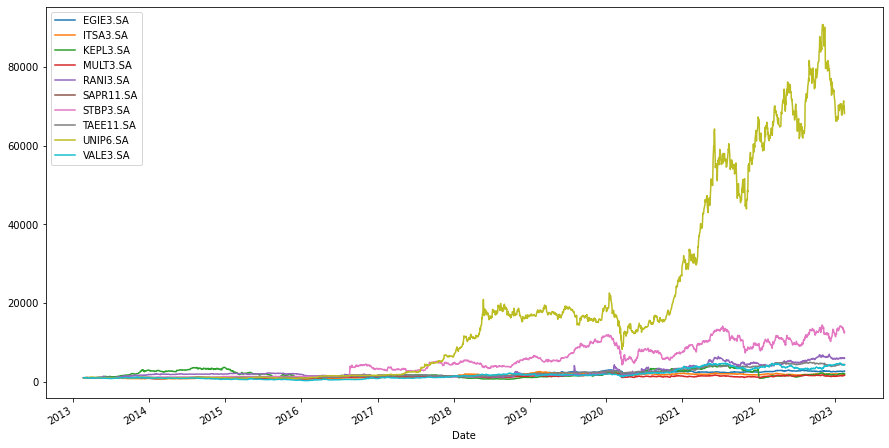

In [ ]:
# Se você aplicasse 1 mil reais em cada ação desde 2013, o resultado de cada empresa conforme o gráfico abaixo.

acoes_sel = (carteira / carteira.iloc[0])*1000
acoes_sel.plot(figsize=(15,8))

In [ ]:
# Vamos somar as ações selecionadas na carteira para comparar a IBOVESPA com o mesmo valor de 10 mil reais

acoes_sel['saldo'] = acoes_sel.sum(axis=1)
ibov1 = (ibov / ibov.iloc[0])*10000

Text(0.5, 1.0, 'Desempenho da carteira previdenciária vs Ibovespa (2013-2023)')

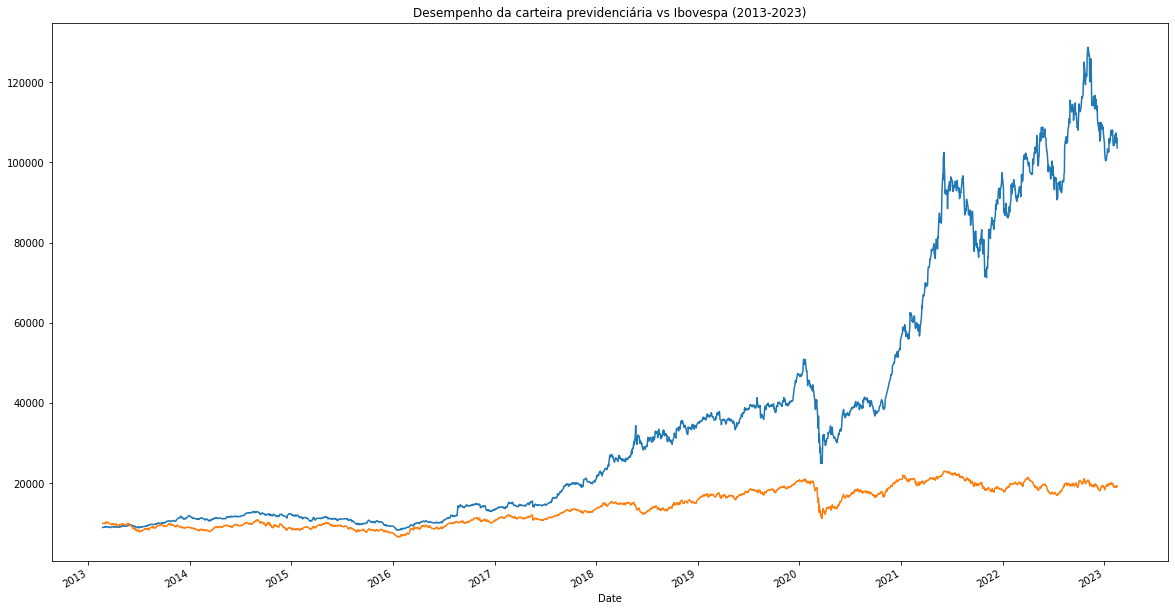

In [ ]:
# Visualização do gráfico da comparação entre a Carteira Previdênciaria e IBOVESPA.

acoes_sel['saldo'].plot(figsize=(20,11), label='Carteira previdênciaria')
ibov1.plot(label='IBOV')
plt.title('Desempenho da carteira previdenciária vs Ibovespa (2013-2023)')

In [ ]:
# Define os parâmetros da carteira
valor_inicial_carteira = 10000
periodo_anos = 10

# Obtém os dados históricos das ações e do índice Ibovespa
data_inicio = pd.Timestamp.now() - pd.DateOffset(years=periodo_anos)
data_fim = pd.Timestamp.now()
df_precos = yf.download(acoes + ['^BVSP'], start=data_inicio, end=data_fim)['Adj Close']

# Calcula o valor da carteira ao longo do tempo
carteira_test = (df_precos[acoes] / df_precos.iloc[0][acoes]).sum(axis=1) * valor_inicial_carteira

# Calcula o valor do índice Ibovespa ao longo do tempo
ibovespa = df_precos['^BVSP'] / df_precos['^BVSP'].iloc[0] * valor_inicial_carteira

# Calcula o retorno da carteira e do índice
retorno_carteira = (carteira_test[-1] / valor_inicial_carteira - 1) * 100
retorno_ibovespa = (ibovespa[-1] / valor_inicial_carteira - 1) * 100

# Calcula a diferença entre a carteira e o índice
diferenca = carteira_test[-1] - ibovespa[-1]

# Exibe o resultado
print('Retorno da carteira:', round(retorno_carteira, 2), '%')
print('Retorno do Ibovespa:', round(retorno_ibovespa, 2), '%')
print('Diferença entre carteira e Ibovespa:', round(diferenca, 2), 'reais')


[*********************100%***********************]  11 of 11 completed
Retorno da carteira: 10266.63 %
Retorno do Ibovespa: 92.78 %
Diferença entre carteira e Ibovespa: 1017384.66 reais


Conclusão> Se você aportasse 10 mil reais em carteira previdênciaria desde o 2018, o retorno renderia 2485,1%, ou seja, 248.510 reais hoje.

OBSERVAÇÂO: Não é recomendação, pois é importante lembrar que a carteira de investimentos existe diversos fatores de risco e incertezas, e não garante a rentabilidade futura. 